# Census Income - Explanatory Data Analysis 
Ali Zolfagharian

# Libraries, connecting to data source

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/dataiku

Mounted at /content/drive
/content/drive/MyDrive/dataiku


# Duplicates, missing values and outliers

**reading census income learn csv files (training and test)**<br>
For having correct name for columns, the names in metadata file has been used, The order needed more consideration, as we had number of categories in each columns, it was possible to find the correct column name. Therefore, we have edited version of csv file here. For simplicity, I avoided doing it here in the notebook. Besides, spaces from the beginning each cell is going to be removed

In [ ]:
data = pd.read_csv('data/census_income_learn_edited.csv',skipinitialspace=True)
test_data = pd.read_csv('data/census_income_test_edited.csv',skipinitialspace=True)


Let's take a look at the the data, and its columns

In [ ]:
pd.set_option('display.max_columns', None); data.head(2)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital status,major industry code,major occupation code,race,hispanic Origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,divdends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,veterans benefits,own business or self employed,fill inc questionnaire for veteran's admin,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000


**'Not in universe'**, appears in many columns, and it means during the survey it was not part of questions. It is technically different from missing value, but for data processing we need to consider them as missing values.
And **'?'** seems is what has been used instead of missing value in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital status                              199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

However, in above table, it says there is no missing values, but indeed 'Not in universe' and '?' should be converted to np.Nan, then we could see missing values in the dataframe <br>


duplicate in the training set is less than .02 and we are going to delete them. Same about the test data to avoid wrong evaluation

In [ ]:
print(f"duplicates of training data: {(len(data)-len(data.drop_duplicates()))/len(data)},duplicates of test data: {(len(test_data)-len(test_data.drop_duplicates()))/len(test_data)} | They have been removed.")
data = data.drop_duplicates();
test_data = test_data.drop_duplicates();

duplicates of training data: 0.016183597880946057,duplicates of test data: 0.008851065535975621 | They have been removed.


Here we could see number of missing values if we consider 'Not in universe' and '?' both as missing values

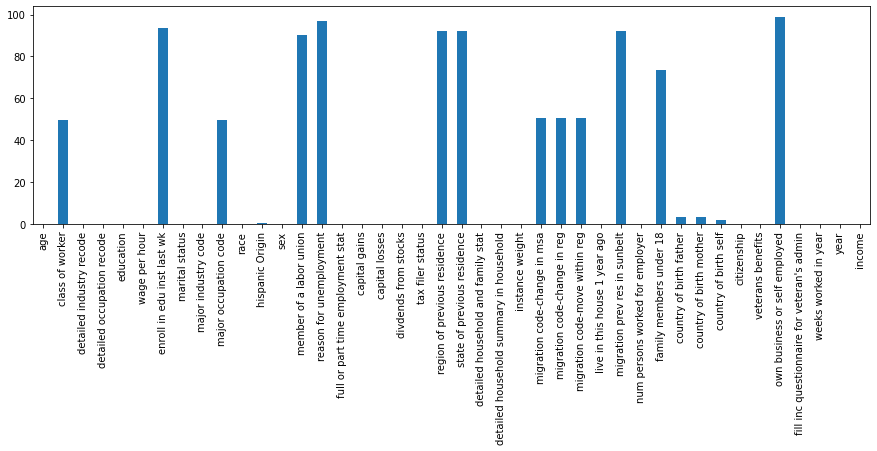

In [ ]:
data = data.replace(['?','Not in universe'], np.NaN);
data_nul = (data.isna().sum()*100 / len(data))
data_nul.plot(kind='bar', figsize=(15,4))

In [ ]:
data_missing_columns = ((data_nul[data_nul>30]).index.tolist());
print('Following columns should be removed, as they have more than 30% missing values.'); print(data_missing_columns)

Following columns should be removed, as they have more than 30% missing values.
['class of worker', 'enroll in edu inst last wk', 'major occupation code', 'member of a labor union', 'reason for unemployment', 'region of previous residence', 'state of previous residence', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'migration prev res in sunbelt', 'family members under 18', 'own business or self employed']


For simplicity we remove them all, and we keep columns with fewer missing value to use the imputer

In [ ]:
data = data.drop(columns=data_missing_columns)

# Outliers, columns data type

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196294 entries, 0 to 199522
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         196294 non-null  int64  
 1   detailed industry recode                    196294 non-null  int64  
 2   detailed occupation recode                  196294 non-null  int64  
 3   education                                   196294 non-null  object 
 4   wage per hour                               196294 non-null  int64  
 5   marital status                              196294 non-null  object 
 6   major industry code                         196294 non-null  object 
 7   race                                        196294 non-null  object 
 8   hispanic Origin                             195424 non-null  object 
 9   sex                                         196294 non-null  object 
 

**change numerical to categorical to avoid miss interpretation by model**

It is better to change data type of following columns to object/string:<br>
*   Years
*   detailed industry recode
*   detailed occupation recode
*   veterans benefits
*   fill inc questionnaire for veteran's admin

In [ ]:
columns_to_non_numerical = ["year", "fill inc questionnaire for veteran's admin", "veterans benefits", "detailed industry recode", "detailed occupation recode"]
for a_col in columns_to_non_numerical:
  data[a_col] = data[a_col].astype(str)
  data[a_col] = data[a_col].astype(str)
  

**Converting 'income. column to a (0,1) binary column**

In [ ]:
data['income'].unique()

array(['-50000', '50000+.'], dtype=object)

we need to change it to 0 and 1, 0 is under and 1 is above 50000 

In [ ]:
data['income']=data['income'].replace(['-50000','50000+.'],['0','1']);

**Numerical and categorical features**

In [ ]:
numerical_features = (data.select_dtypes(include=np.number).columns.tolist())
categorical_features = (data.select_dtypes(exclude=np.number).columns.tolist())
assert(len(numerical_features)+len(categorical_features)==len(data.columns.tolist()))

## Numerical features

Histogram of all numerical features

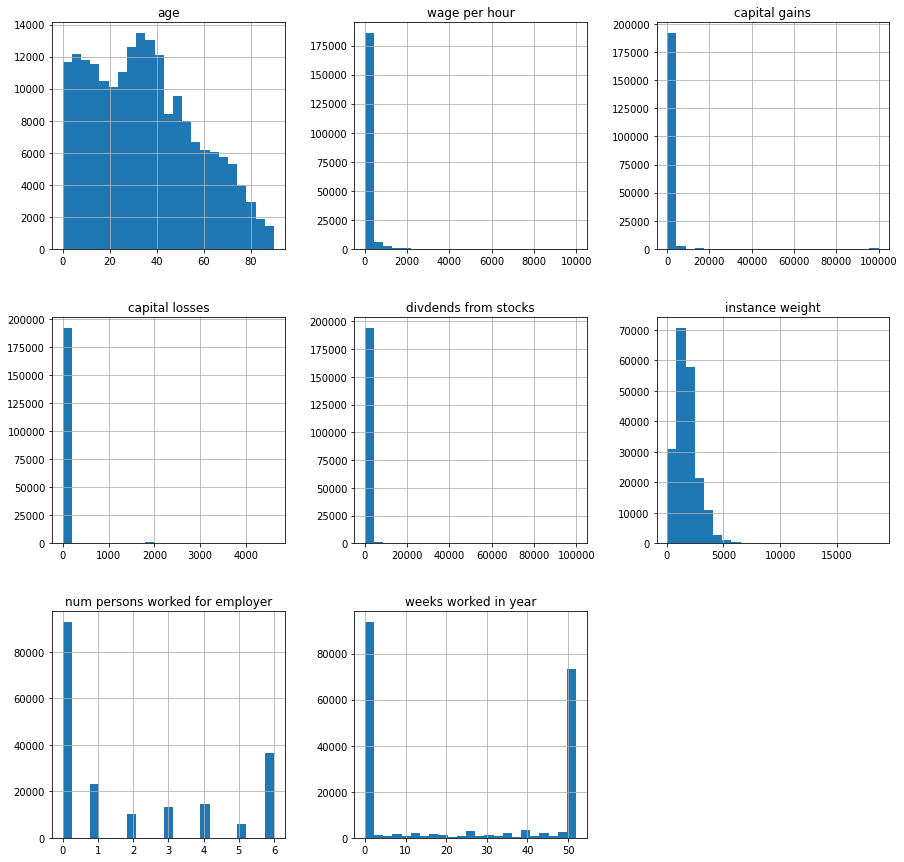

In [ ]:
data[numerical_features].hist(figsize=(15,15),bins=23);


'Age' has positive skew which is normal and expected, 'num persons worked for employer' and 'weeks worked in year' seems plausible, but the rest have outlier that probably need some amendments, let's use box plot



In [ ]:
fig = px.box(data[numerical_features].melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In the above box plots of numerical features, have many zeros and many of their positive value has been visualized like outliers

*   wage per hour
*   capital gain
*   capital losses
*   divdends from stocks

Lets see the numbers

In [ ]:
for a_col in numerical_features:
  print(data[a_col].quantile([0.05,0.25,0.5,0.75,0.95]));print('--------')

0.05     3.0
0.25    16.0
0.50    34.0
0.75    50.0
0.95    75.0
Name: age, dtype: float64
--------
0.05      0.0
0.25      0.0
0.50      0.0
0.75      0.0
0.95    500.0
Name: wage per hour, dtype: float64
--------
0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    0.0
Name: capital gains, dtype: float64
--------
0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    0.0
Name: capital losses, dtype: float64
--------
0.05      0.0
0.25      0.0
0.50      0.0
0.75      0.0
0.95    400.0
Name: divdends from stocks, dtype: float64
--------
0.05     394.9995
0.25    1061.5300
0.50    1620.1750
0.75    2194.0600
0.95    3593.1400
Name: instance weight, dtype: float64
--------
0.05    0.0
0.25    0.0
0.50    1.0
0.75    4.0
0.95    6.0
Name: num persons worked for employer, dtype: float64
--------
0.05     0.0
0.25     0.0
0.50    12.0
0.75    52.0
0.95    52.0
Name: weeks worked in year, dtype: float64
--------


It seems **capital gain** and **capital losses** culd be removed, but let's keep them, and fix it when we make the model

## Categorical features

Unique values in every categorical feature:

In [ ]:
cat_uniques = []
all_uniques = 0
for a_col in categorical_features:
  un = data[a_col].nunique()
  cat_uniques.append(un); all_uniques += un

pd.DataFrame([cat_uniques],columns=categorical_features)

,detailed industry recode,detailed occupation recode,education,marital status,major industry code,race,hispanic Origin,sex,full or part time employment stat,tax filer status,detailed household and family stat,detailed household summary in household,live in this house 1 year ago,country of birth father,country of birth mother,country of birth self,citizenship,veterans benefits,fill inc questionnaire for veteran's admin,year,income
0,52,47,17,7,24,5,9,2,8,6,38,8,3,42,42,42,5,3,3,2,2


In [ ]:
print(f"number of all uniques: {all_uniques}, if all onehotencoded: {all_uniques-len(categorical_features)}")

number of all uniques: 367, if all onehotencoded: 346


In [ ]:
data['full or part time employment stat'].unique()

array(['Not in labor force', 'Children or Armed Forces',
       'Full-time schedules', 'Unemployed full-time',
       'Unemployed part- time', 'PT for non-econ reasons usually FT',
       'PT for econ reasons usually PT', 'PT for econ reasons usually FT'],
      dtype=object)

However for some features we could use ordinal encoding, e.g. full or part time employment stat, using only one hot encoding is also plausible. Specially in some cases it is not clear how ordinal encoding should be done. For improvement in future, this could be considered

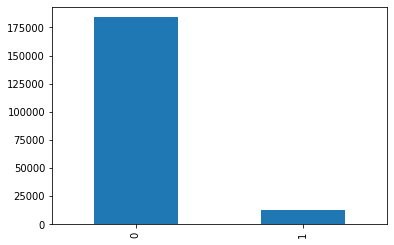

In [ ]:
data['income'].value_counts().plot(kind='bar')

unbalanced target. We need to consider when we build the model

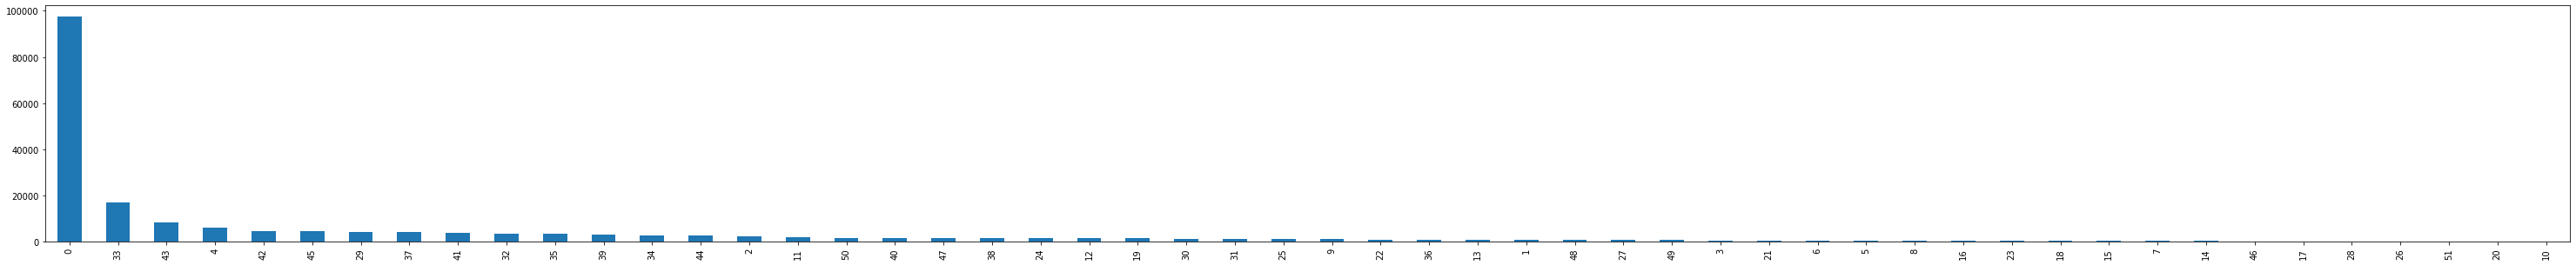

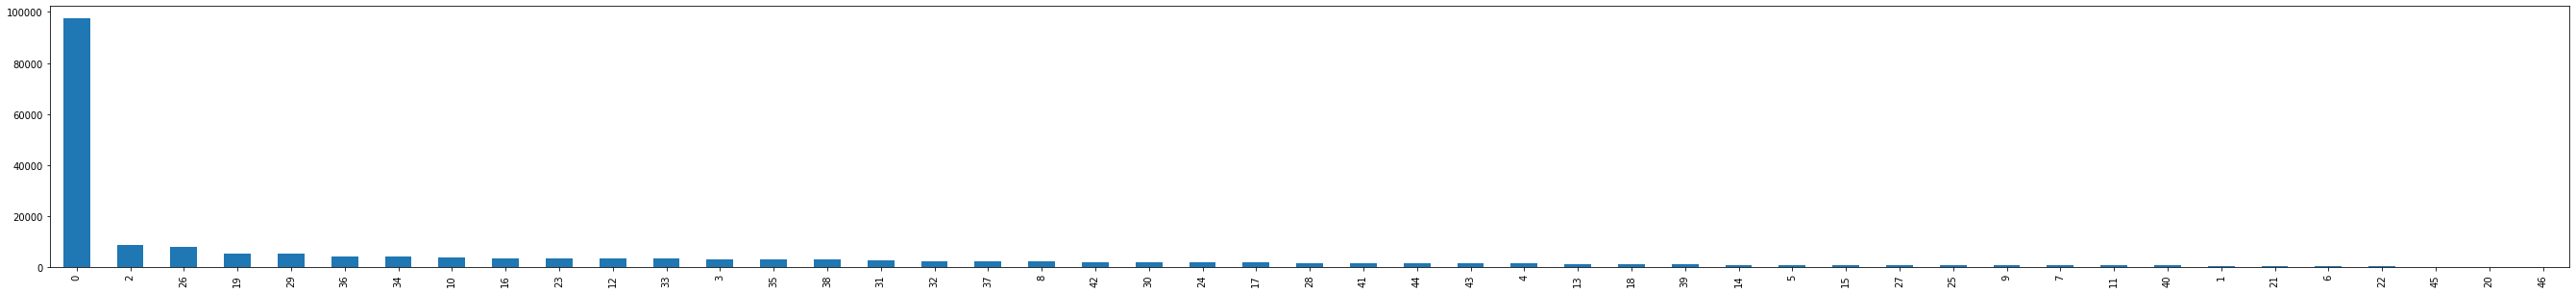

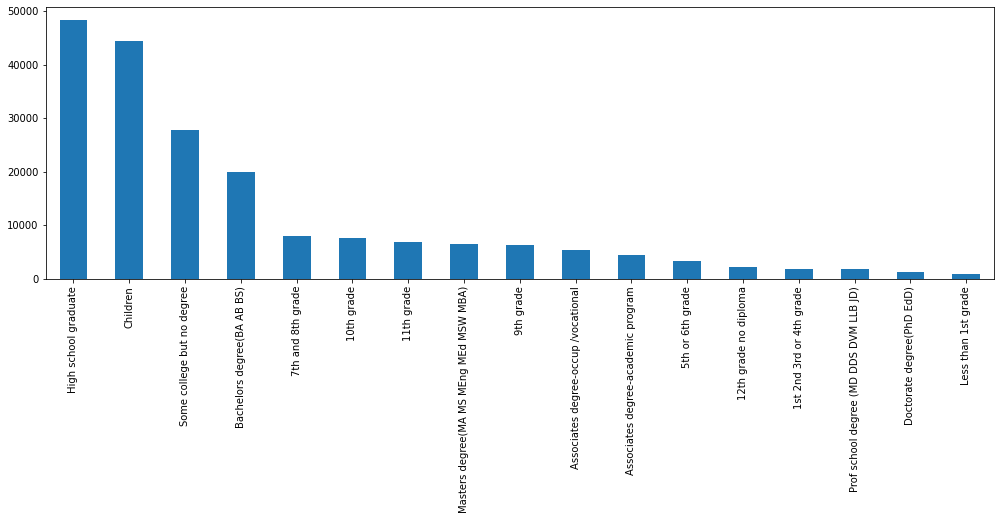

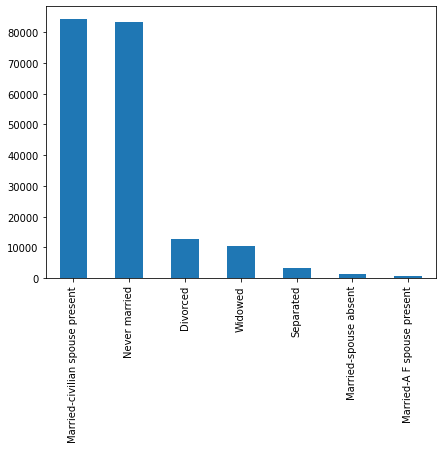

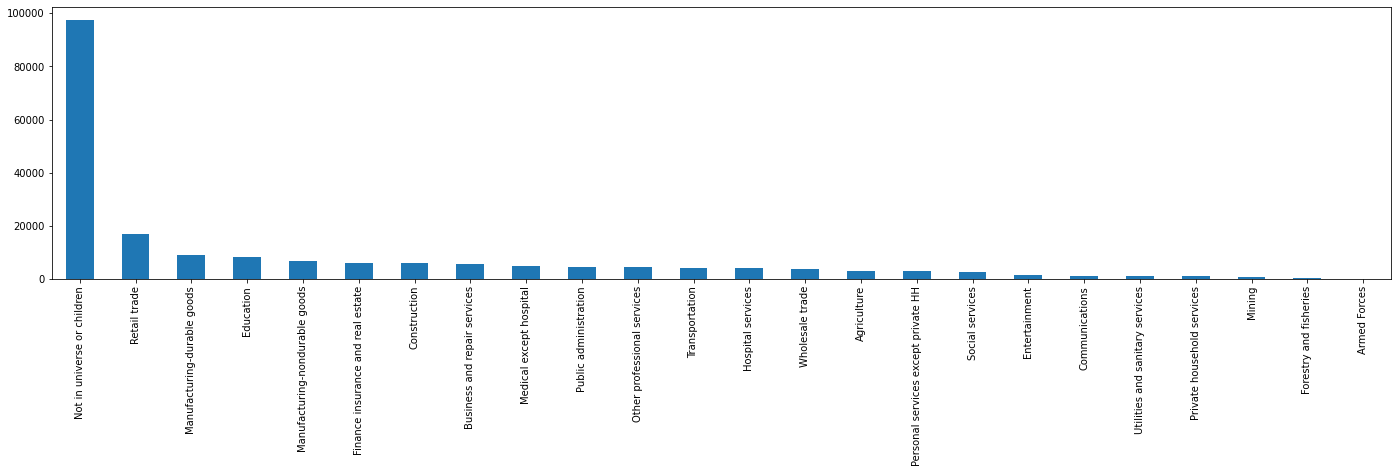

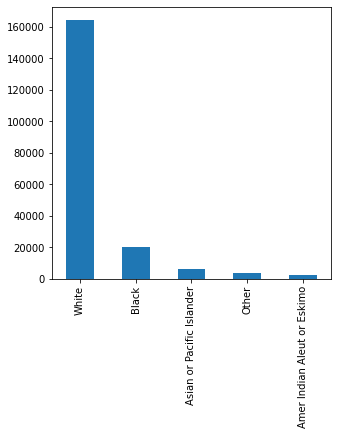

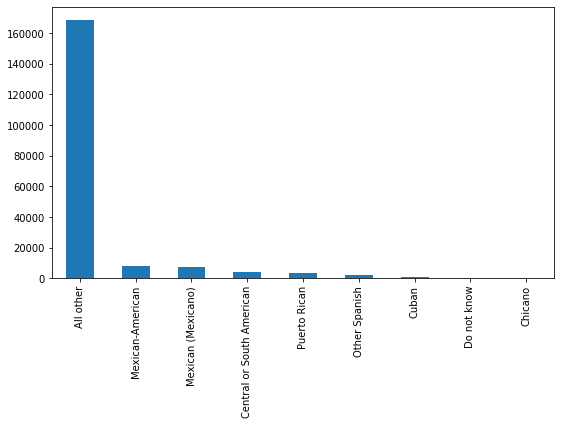

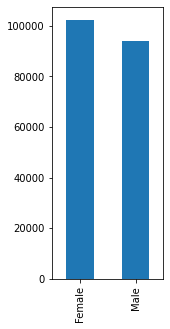

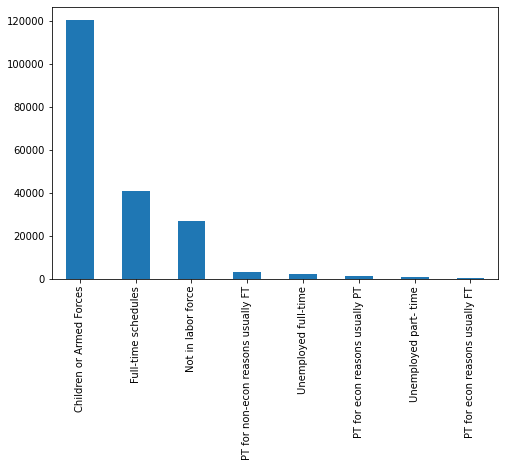

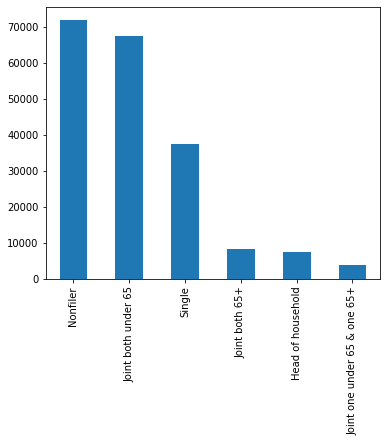

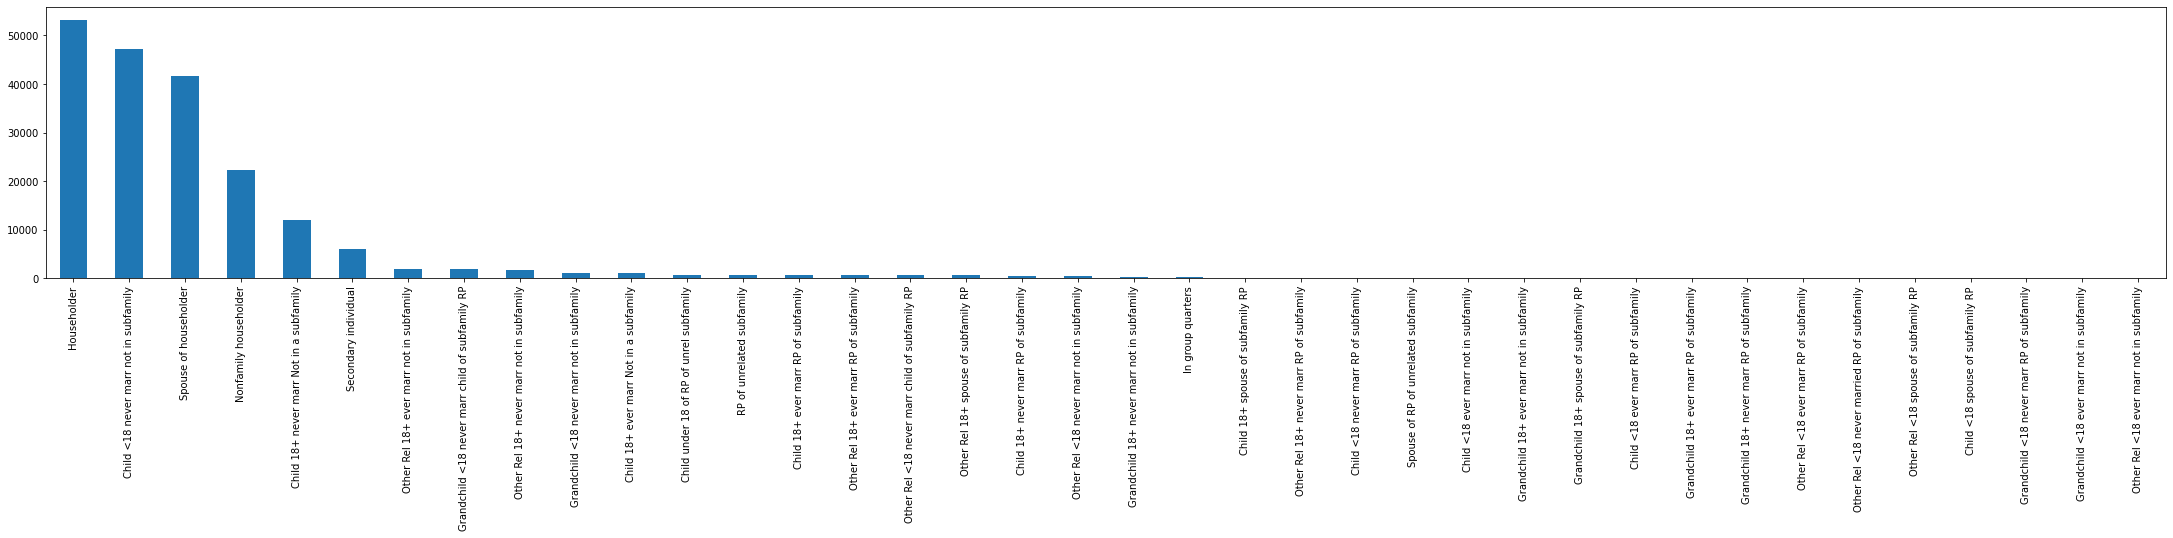

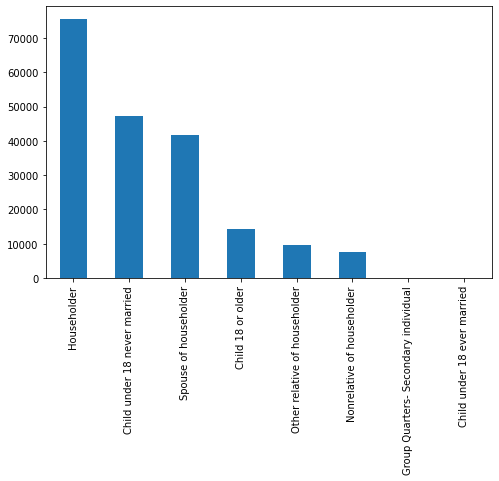

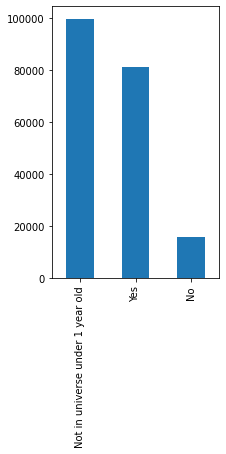

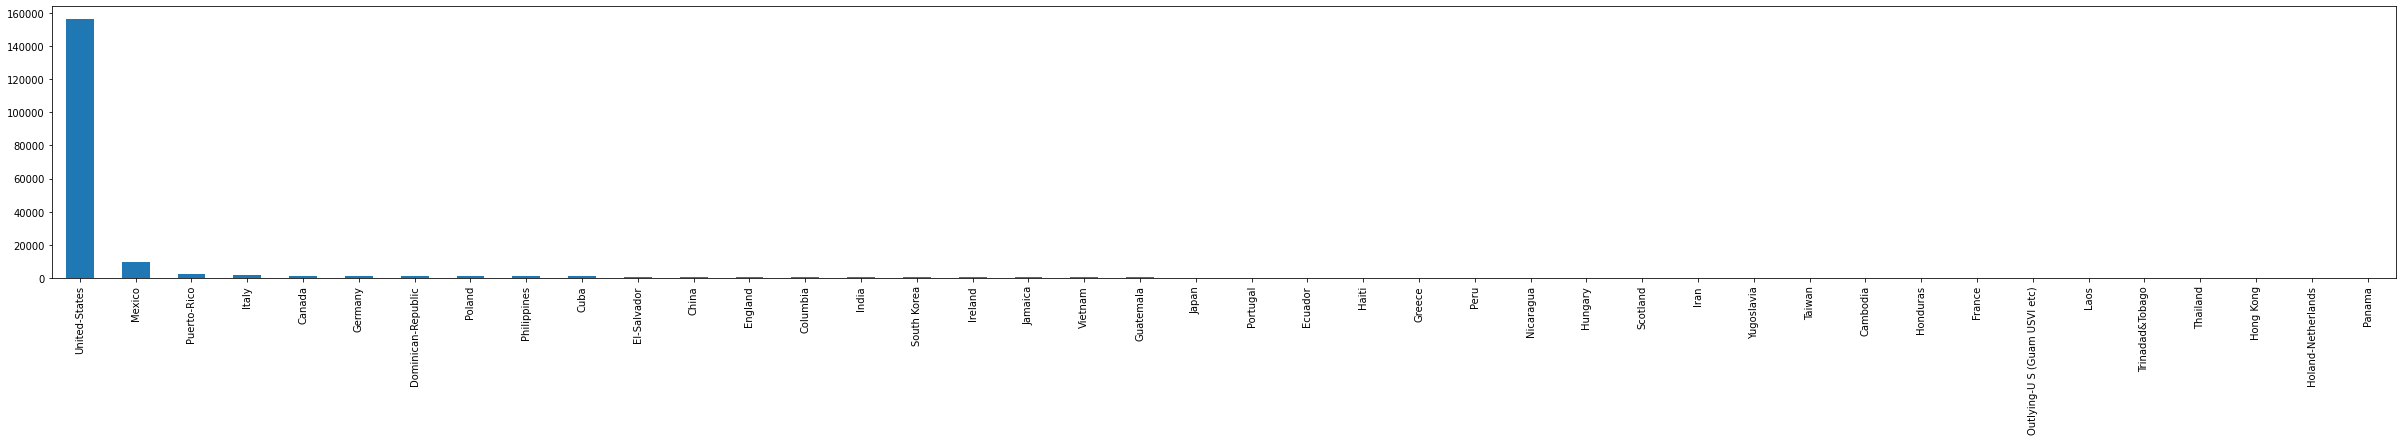

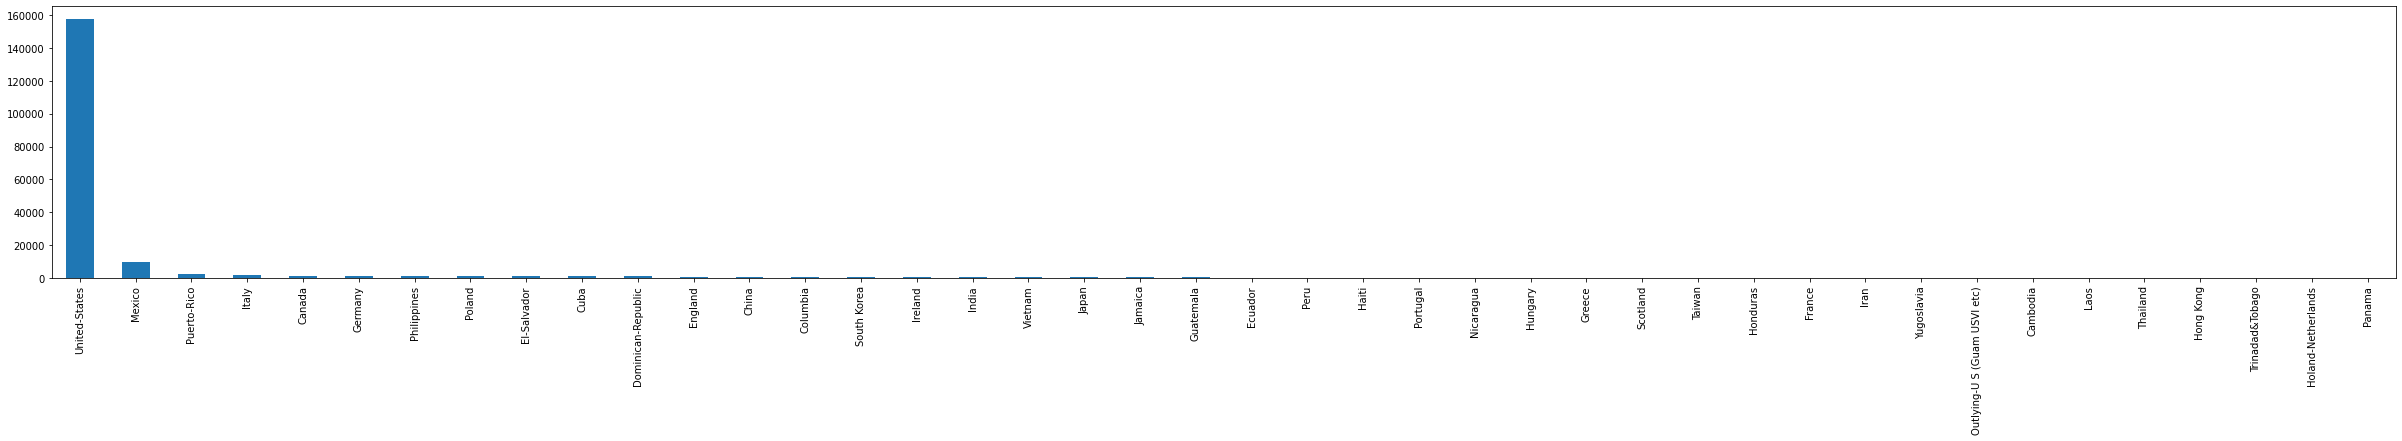

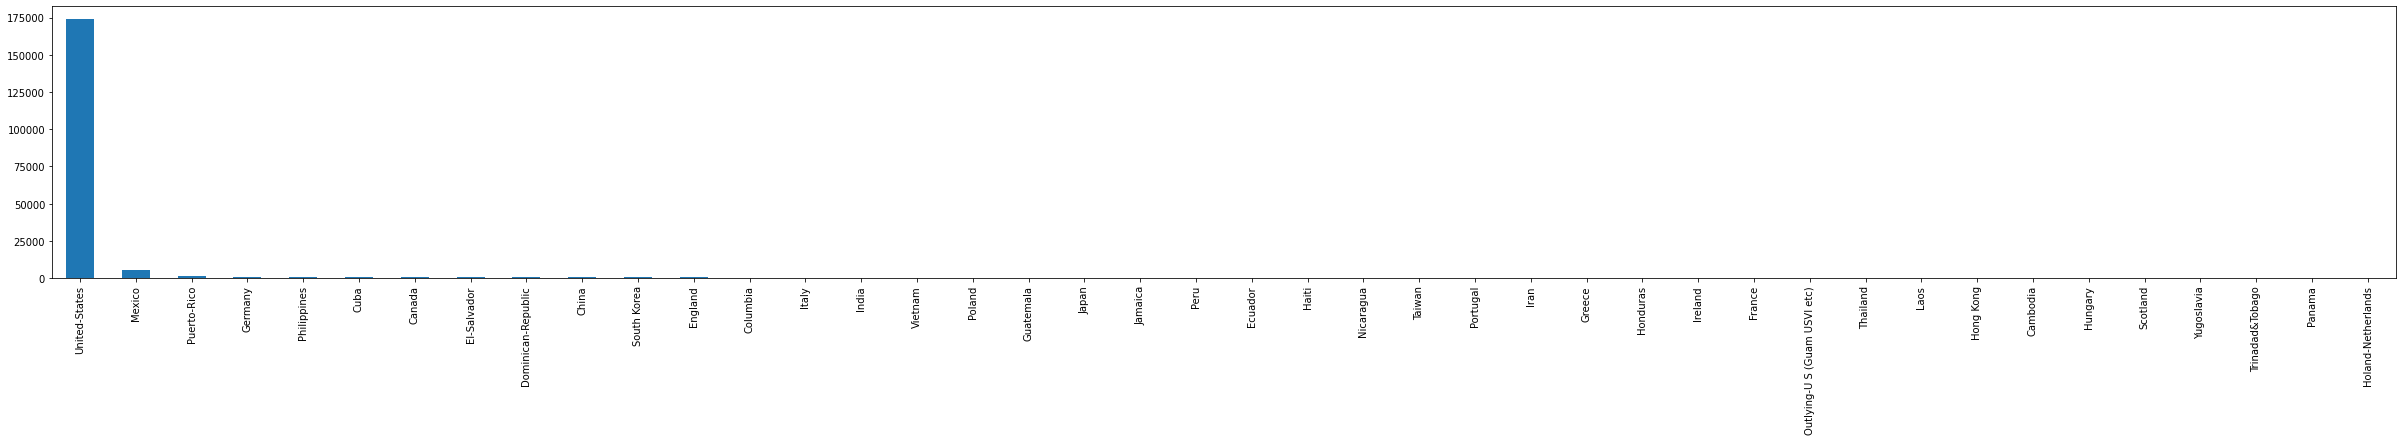

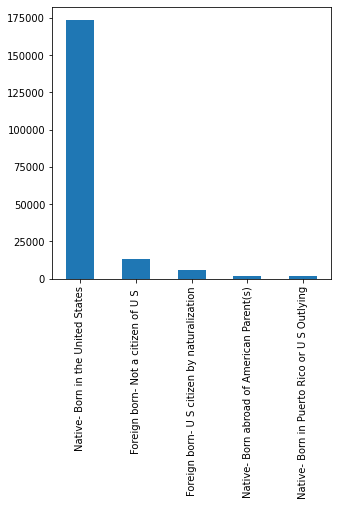

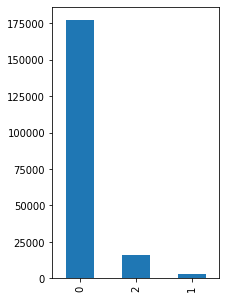

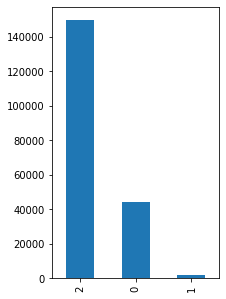

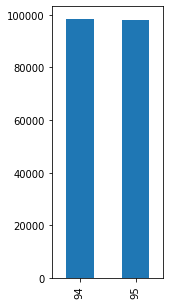

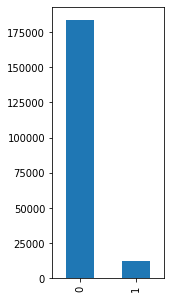

In [ ]:
for i in range(len(categorical_features)):
    size_plt = data[categorical_features[i]].nunique()*1
    data[categorical_features[i]].value_counts().plot(kind='bar',figsize=(size_plt,5))
    plt.show()
    plt.close()


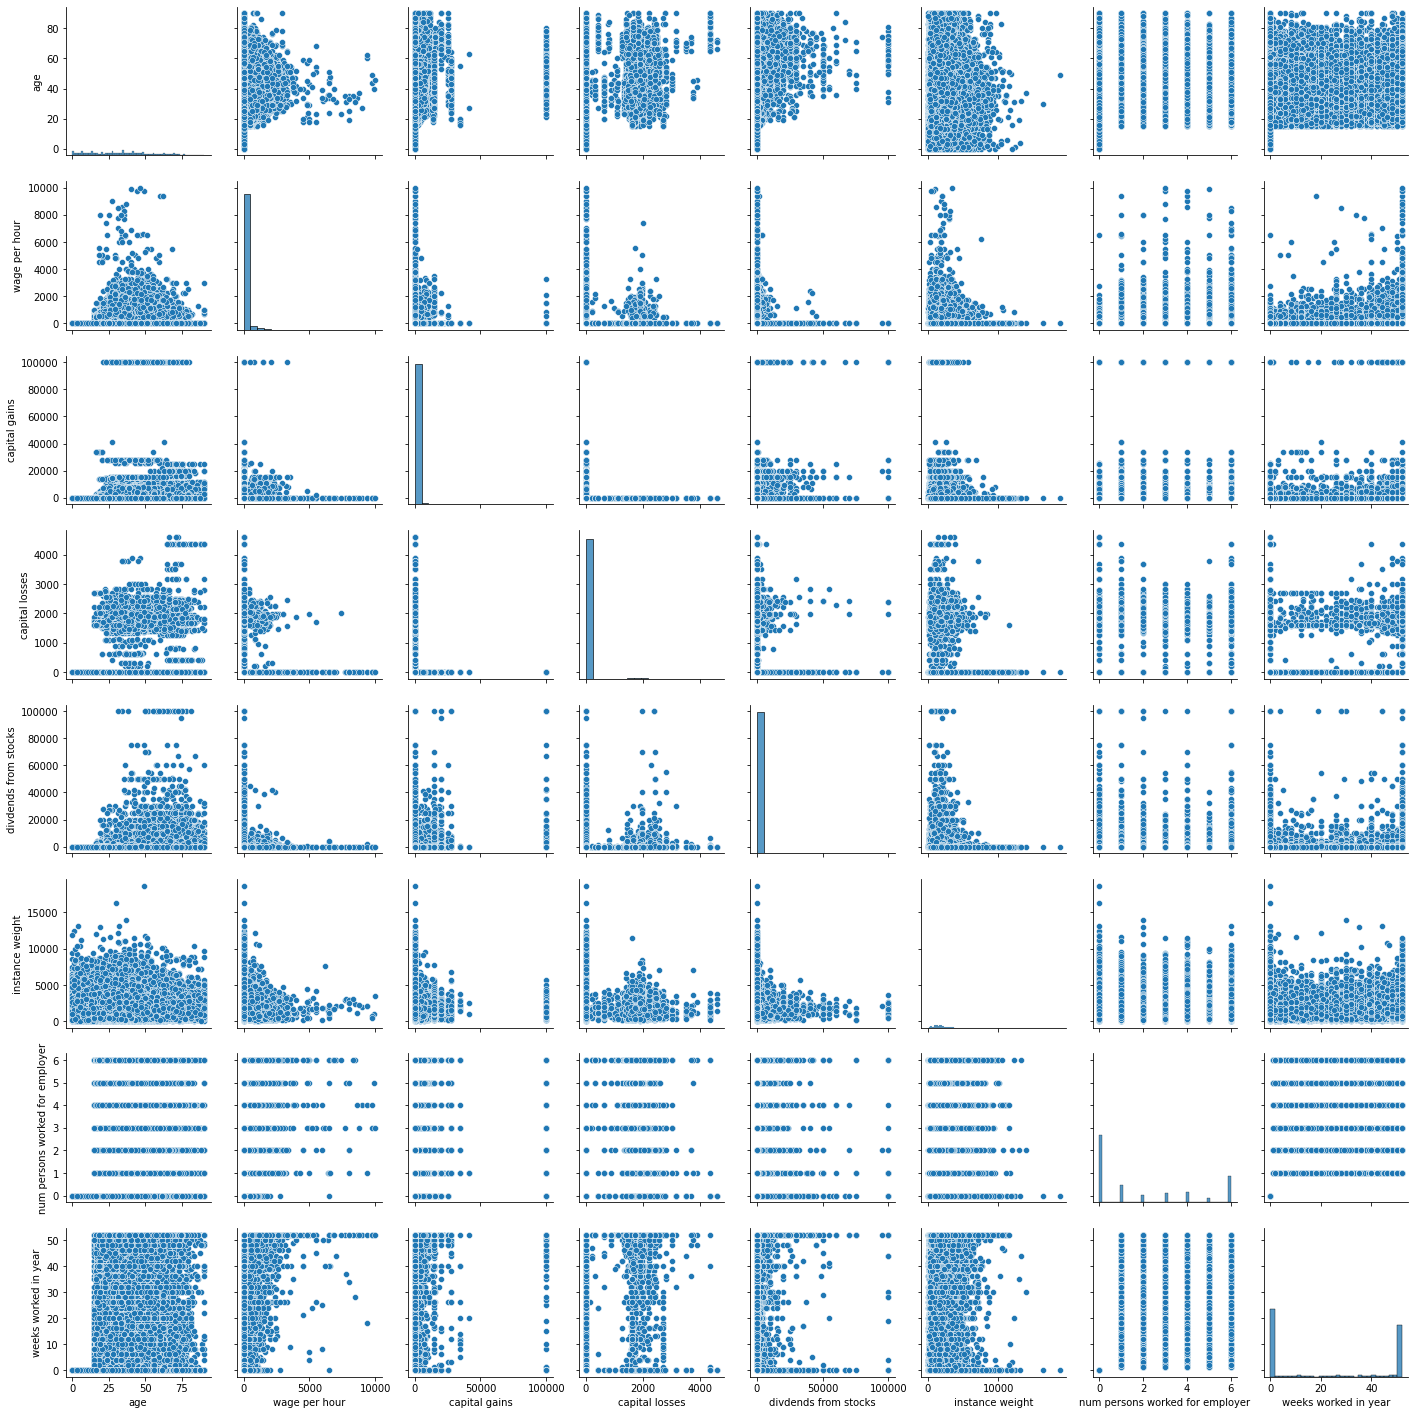

In [ ]:
sns.pairplot(data[numerical_features])

We could start preprocessing now. But before that lets make a function that does simple things that we did so far to the dataframe. This need to be added to the preprocessing notebook and package

In [ ]:
def prep_data(_data):
  '''get a dataframe, then it replace not in universe and ? to np.nan, and makes some numerical columns to categorical, 
     it removes columns with many missing values, and turn target columns to a binary 0 and 1'''
  _data = _data.replace(['?','Not in universe'], np.NaN);
  columns_to_non_numerical = ["year", "fill inc questionnaire for veteran's admin", "veterans benefits", "detailed industry recode", "detailed occupation recode"]
  for a_col in columns_to_non_numerical:
    _data[a_col] = _data[a_col].astype(str)
  _data_nul = (_data.isna().sum()*100 / len(_data))
  data_missing_columns = np.array((_data_nul[_data_nul>30]).index.tolist())
  _data = _data.drop(columns=data_missing_columns)
  _data = _data.replace(['-50000','50000+.'],['0','1'])
  return _data

Now we are going to start the preprocessing